# Mounting Google Drive

In [ ]:
from  google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Dataset Information
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.


# 1) Importing Requisite Libraries

In [ ]:
import numpy as np
import pandas as pd
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

# 2) Loading The Dataset

In [ ]:
DataFrame = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset/diabetes.csv")
DataFrame.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
DataFrame.shape

(768, 9)

In [ ]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Observations:
1) There are 768 rows and 9 columns/features.<br>
2) BMI and DiabetesPedigreeFunction are float and rest all the columns are integer type.<br>
3) There are no null values.<br>
4) Input Variables:<br>
**Pregnancies**: Number of times pregnant<br>
**Glucose**: Plasma glucose concentration at 2 hours in an oral glucose tolerance test<br>
**BloodPressure**: Diastolic blood pressure (mm Hg)<br>
**SkinThickness**: Triceps skin fold thickness (mm)<br>
**Insulin**: 2-hour serum insulin (mu U/ml)<br>
**BMI**: Body mass index (weight in kg/(height in m)^2)<br>
**Diabetes pedigree function**:<br>
**Age**: years<br>
5) Target Variable: **Outcome**

In [ ]:
DataFrame = np.loadtxt("/content/drive/MyDrive/Colab Notebooks/dataset/diabetes.csv",skiprows=1,delimiter=',')
DataFrame
# Loading the dataset as a multi dimension array, because we need numerical values only. Pandas dataframe can also be converted into nD array.

array([[  6.   , 148.   ,  72.   , ...,   0.627,  50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   , ...,   0.351,  31.   ,   0.   ],
       [  8.   , 183.   ,  64.   , ...,   0.672,  32.   ,   1.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,   0.245,  30.   ,   0.   ],
       [  1.   , 126.   ,  60.   , ...,   0.349,  47.   ,   1.   ],
       [  1.   ,  93.   ,  70.   , ...,   0.315,  23.   ,   0.   ]])

In [ ]:
# Separating the Input and Output Variables
X = DataFrame[:,0:8]
y = DataFrame[:,8]

In [ ]:
# Splitting the data into train test split in the ratio of 80:20
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train))

(614, 8) (154, 8) (614,) (154,) <class 'numpy.ndarray'>


In [ ]:
# Making multi layer Perceptron using keras

model = Sequential() # Arrange the layers in sequential manner

model.add(Dense(12, input_shape=(8,), activation='sigmoid')) 
#the shape of the input to the model is defined as an argument on the first hidden layer, so it is defining the input or visible layer and the first hidden layer.

model.add(Dense(8, activation='sigmoid'))

model.add(Dense(1, activation='sigmoid'))

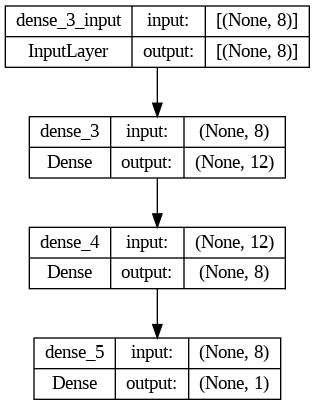

In [ ]:
from keras.utils import plot_model
plot_model(model,show_shapes=True,show_layer_names=True)

In [ ]:
# Compiling the model aka training it to find the best weights
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# adam(version of gradient descent) automatically tunes itself and gives good results in a wide range of problems

In [ ]:
# Fitting the model onto the data
model.fit(X_train,y_train, epochs=150, batch_size=10,verbose=1)

# Epoch: One pass through all the rows of the training dataset
# Batch: One or more samples considered by the model within an epoch before weights are updated
# One epoch comprises one or more batches, based on the chosen batch size, and the model is fit for many epochs.

Epoch 1/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7541
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5194 - accuracy: 0.7671
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5248 - accuracy: 0.7508
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5230 - accuracy: 0.7541
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7590
Epoch 6/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7541
Epoch 7/150
62/62 [==============================] - 0s 2ms/step - loss: 0.5224 - accuracy: 0.7638
Epoch 8/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5202 - accuracy: 0.7590
Epoch 9/150
62/62 [==============================] - 0s 5ms/step - loss: 0.5202 - accuracy: 0.7655
Epoch 10/150
62/62 [==============================] - 0s 4ms/step - loss: 0.5189 - accuracy: 0.7687
Epoch 11/

In [ ]:
# evaluating the model
loss, accuracy = model.evaluate(X_test, y_test,verbose=0)
print('Model loss: %.2f , Accuracy: %.2f' % ((loss*100),(accuracy*100)))

Model loss: 63.99 , Accuracy: 66.23
